In [ ]:
!pip install --upgrade derivative
!pip install scikit-learn==1.0.2
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeptime 0.4.4 requires scikit-learn>=1.1, but you have scikit-learn 1.0.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install pysindy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 3.5 MB/s eta 0:00:00


In [8]:
x0_train = [np.random.uniform(-3, 3),np.random.uniform(-3, 3),np.random.uniform(-3, 3)]
print(x0_train)

[0.3144534530977241, 1.3784224336309974, 2.5526296258523526]


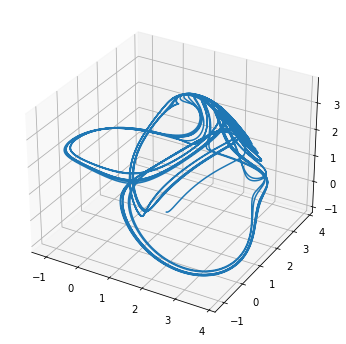

In [46]:
# Generate training data
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

b=0.208186

def t_attr(state, t):
    x, y, z = state  # Unpack the state vector
    return  [np.sin(y) - b * x, np.sin(z) - b * y, np.sin(x) - b * z]  # Derivatives

dt = 0.01
t_train = np.arange(0, 500, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [np.random.uniform(-3, 3),np.random.uniform(-3, 3),np.random.uniform(-3, 3)]
x_train = odeint(t_attr, x0_train, t_train)
x_dot_train_measured = np.array(
    [t_attr(x_train[i],0) for i in range(t_train.size)]
)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2])
plt.draw()
plt.show()

In [17]:
# Fit the models and simulate (1min max se supera far ripartire)

poly_order = 5
threshold = 0.05

noise_levels = [1e-4, 1e-3, 1e-2, 1e-1, 1]

models = []
t_sim = np.arange(0, 100, dt)
x_sim = []
for eps in noise_levels:
    model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.GeneralizedLibrary([ps.PolynomialLibrary(degree=poly_order),ps.FourierLibrary()]),
    )
    model.fit(
        x_train,
        t=dt,
        x_dot=x_dot_train_measured
        + np.random.normal(scale=eps, size=x_train.shape),
        quiet=True,
    )
    models.append(model)
    x_sim.append(model.simulate(x_train[0], t_sim))

In [33]:
print(models[0].equations())
print(models[1].equations())
print(models[2].equations())
print(models[3].equations())
print(models[4].equations())

['-0.208 x0 + 1.000 sin(1 x1)', '-0.208 x1 + 1.000 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.208 x0 + 1.000 sin(1 x1)', '-0.208 x1 + 1.000 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.208 x0 + 1.000 sin(1 x1)', '-0.208 x1 + 1.000 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.208 x0 + 1.001 sin(1 x1)', '-0.295 1 + 0.324 cos(1 x1) + 0.964 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.144 1 + -0.207 x0 + 2.731 x1 + -0.523 x1^3 + 0.081 x1^4 + -1.628 sin(1 x1) + 0.142 cos(1 x1)', '-0.213 x1 + 1.002 sin(1 x2)', '-0.211 x2 + 1.000 sin(1 x0)']


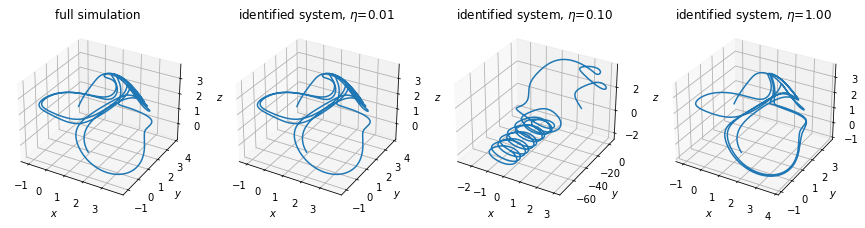

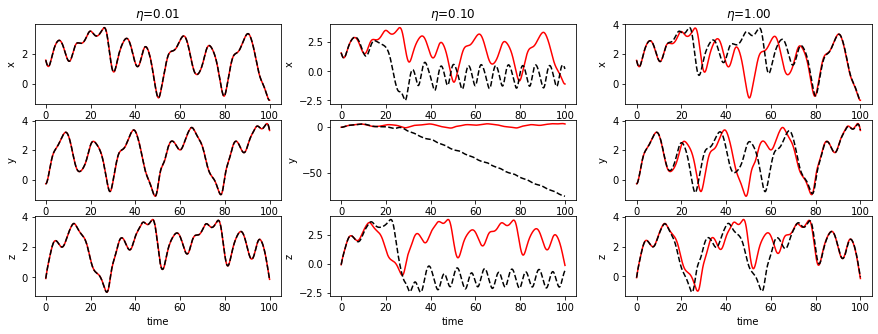

In [27]:
# Plot results

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(141, projection="3d")
ax.plot(
    x_train[: t_sim.size, 0],
    x_train[: t_sim.size, 1],
    x_train[: t_sim.size, 2],
)
plt.title("full simulation")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 2
ax = fig.add_subplot(142, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 3
ax = fig.add_subplot(143, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 4
ax = fig.add_subplot(144, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

fig = plt.figure(figsize=(15, 5))
model_idx = 2
ax = fig.add_subplot(331)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(334)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

ax = fig.add_subplot(337)
ax.plot(t_sim, x_train[: t_sim.size, 2], "r")
ax.plot(t_sim, x_sim[model_idx][:, 2], "k--")
plt.xlabel("time")
plt.ylabel("z")

model_idx = 3
ax = fig.add_subplot(332)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(335)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

ax = fig.add_subplot(338)
ax.plot(t_sim, x_train[: t_sim.size, 2], "r")
ax.plot(t_sim, x_sim[model_idx][:, 2], "k--")
plt.xlabel("time")
plt.ylabel("z")

model_idx = 4
ax = fig.add_subplot(333)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(336)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

ax = fig.add_subplot(339)
ax.plot(t_sim, x_train[: t_sim.size, 2], "r")
ax.plot(t_sim, x_sim[model_idx][:, 2], "k--")
plt.xlabel("time")
plt.ylabel("z")

fig.show()

In [22]:
# Fit the models and simulate (1min max se supera far ripartire)

noise_levels = [1e-4, 1e-3, 1e-2, 1e-1, 1]

models_noD = []
t_sim = np.arange(0, 100, dt)
x_sim_noD = []
for eps in noise_levels:
    model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.GeneralizedLibrary([ps.PolynomialLibrary(degree=poly_order),ps.FourierLibrary()]),
    )
    model.fit(x_train + np.random.normal(scale=eps, size=x_train.shape), 
              t=dt, quiet=True)
    models_noD.append(model)
    x_sim_noD.append(model.simulate(x_train[0], t_sim))

In [34]:
print(models_noD[0].equations())
print(models_noD[1].equations())
print(models_noD[2].equations())
print(models_noD[3].equations())
print(models_noD[4].equations())

['-0.208 x0 + 1.000 sin(1 x1)', '-0.208 x1 + 1.000 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.208 x0 + 1.000 sin(1 x1)', '-0.208 x1 + 1.000 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.208 x0 + 1.000 sin(1 x1)', '-0.208 x1 + 1.000 sin(1 x2)', '-0.208 x2 + 1.000 sin(1 x0)']
['-0.406 1 + -0.195 x0 + 1.980 x1 + -0.217 x2 + 0.179 x1^2 + 0.071 x2^2 + -0.445 x1^3 + 0.066 x1^4 + -0.888 sin(1 x1) + 0.316 cos(1 x1) + 0.218 sin(1 x2)', '-1.062 1 + 0.224 x0 + -0.204 x1 + 1.034 x2 + -0.075 x0^2 + 0.398 x2^2 + -0.154 x2^3 + -0.220 sin(1 x0) + 1.207 cos(1 x2)', '-1.631 1 + -8.933 x1 + -0.195 x2 + 1.005 x1^2 + 1.595 x1^3 + -0.288 x1^4 + 0.949 sin(1 x0) + 8.787 sin(1 x1) + 1.610 cos(1 x1)']
['0.178 x0 + 0.272 x1 + -0.193 x2 + -0.136 x0^2 + 0.082 x1^2 + -0.092 x1 x2 + 0.192 x0^2 x1 + -0.055 x0^2 x1^2 + -0.359 sin(1 x0) + -0.150 cos(1 x0) + -0.228 sin(1 x1) + 1.426 cos(1 x1) + -1.232 cos(1 x2)', '2.261 1 + -0.652 x0 + 1.841 x1 + -1.122 x2 + 0.121 x0 x1 + -0.140 x0 x2 + -0.645 x1^2 + 0.072 x1 x2 

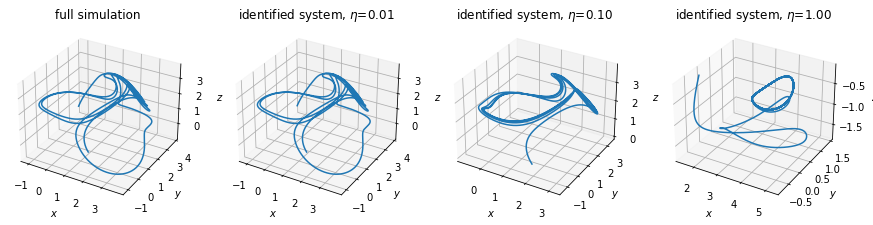

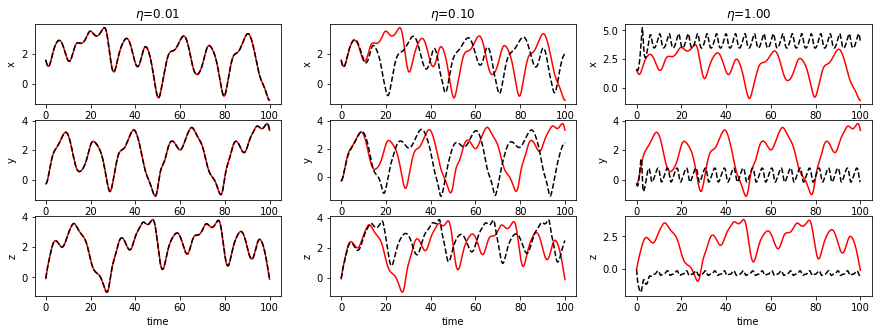

In [28]:
# Plot results

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(141, projection="3d")
ax.plot(
    x_train[: t_sim.size, 0],
    x_train[: t_sim.size, 1],
    x_train[: t_sim.size, 2],
)
plt.title("full simulation")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 2
ax = fig.add_subplot(142, projection="3d")
ax.plot(x_sim_noD[model_idx][:, 0], x_sim_noD[model_idx][:, 1], x_sim_noD[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 3
ax = fig.add_subplot(143, projection="3d")
ax.plot(x_sim_noD[model_idx][:, 0], x_sim_noD[model_idx][:, 1], x_sim_noD[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 4
ax = fig.add_subplot(144, projection="3d")
ax.plot(x_sim_noD[model_idx][:, 0], x_sim_noD[model_idx][:, 1], x_sim_noD[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}")
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

fig = plt.figure(figsize=(15, 5))
model_idx = 2
ax = fig.add_subplot(331)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(334)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

ax = fig.add_subplot(337)
ax.plot(t_sim, x_train[: t_sim.size, 2], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 2], "k--")
plt.xlabel("time")
plt.ylabel("z")

model_idx = 3
ax = fig.add_subplot(332)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(335)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

ax = fig.add_subplot(338)
ax.plot(t_sim, x_train[: t_sim.size, 2], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 2], "k--")
plt.xlabel("time")
plt.ylabel("z")

model_idx = 4
ax = fig.add_subplot(333)
ax.plot(t_sim, x_train[: t_sim.size, 0], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 0], "k--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(336)
ax.plot(t_sim, x_train[: t_sim.size, 1], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 1], "k--")
plt.xlabel("time")
plt.ylabel("y")

ax = fig.add_subplot(339)
ax.plot(t_sim, x_train[: t_sim.size, 2], "r")
ax.plot(t_sim, x_sim_noD[model_idx][:, 2], "k--")
plt.xlabel("time")
plt.ylabel("z")

fig.show()

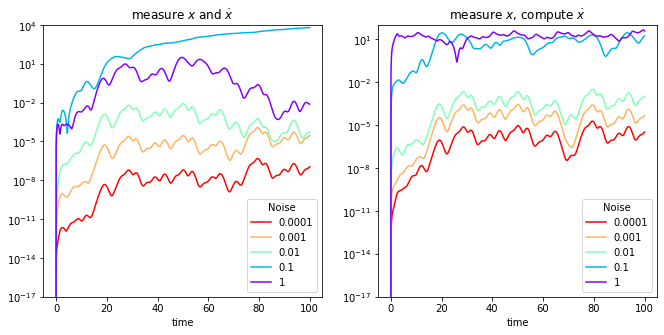

In [23]:
colors = rainbow(np.linspace(1, 0, len(models)))

fig, axs = plt.subplots(1, 2, figsize=(11, 5))
for i, x in enumerate(x_sim):
    axs[0].semilogy(
        t_sim,
        np.sum((x - x_train[: t_sim.size]) ** 2, axis=1),
        color=colors[i],
        label=noise_levels[i],
    )
axs[0].set(xlabel="time", title="measure $x$ and $\dot{x}$")
axs[0].legend(title="Noise")
axs[0].set_ylim(1e-17, 1e4)

for i, x in enumerate(x_sim_noD):
    axs[1].semilogy(
        t_sim,
        np.sum((x - x_train[: t_sim.size]) ** 2, axis=1),
        color=colors[i],
        label=noise_levels[i],
    )

axs[1].set(xlabel="time", title="measure $x$, compute $\dot{x}$")
axs[1].legend(title="Noise")
axs[1].set_ylim(1e-17, 1e2)

fig.show()